# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_rideid_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rideid_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
type_drivercount_total = city_data_df.groupby(["type"]).sum()["driver_count"]
type_drivercount_total

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
type_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_total.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = type_fare_total / type_rideid_count
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = type_fare_total / type_drivercount_total
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
import pandas as pd
summary_data = {'Total Rides':type_rideid_count, 'Total Drivers':type_drivercount_total, 'Total Fares':type_fare_total, 'Average Fare per Ride':average_fare_ride, 'Average Fare per Driver':average_fare_driver}
pyber_summary_df = pd.DataFrame(summary_data, index= ['Rural','Suburban','Urban'])
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df.loc[:, "Total Rides"] = pyber_summary_df["Total Rides"].map('{:,}'.format)
pyber_summary_df.loc[:, "Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [37]:
# Add Matplotlib inline magic command
%matplotlib inline
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,$13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,$20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,$11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,$44.94,4256853490277,4,Rural


In [38]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pivot_fare = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
pivot_fare

date                 type    
2019-01-01 00:08:16  Urban      $37.91
2019-01-01 00:46:46  Suburban   $47.74
2019-01-01 02:07:24  Suburban   $24.07
2019-01-01 03:46:50  Urban       $7.57
2019-01-01 05:23:21  Urban      $10.75
                                 ...  
2019-05-08 04:20:00  Urban      $21.99
2019-05-08 04:39:49  Urban      $18.45
2019-05-08 07:29:01  Urban      $18.55
2019-05-08 11:38:35  Urban      $19.77
2019-05-08 13:10:18  Urban      $18.04
Name: fare, Length: 2375, dtype: float64

In [39]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

pivot_fare = pivot_fare.reset_index()
pivot_fare.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,$37.91
1,2019-01-01 00:46:46,Suburban,$47.74
2,2019-01-01 02:07:24,Suburban,$24.07
3,2019-01-01 03:46:50,Urban,$7.57
4,2019-01-01 05:23:21,Urban,$10.75


In [40]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_fare = pivot_fare.pivot(index="date", 
                    columns="type", 
                    values="fare")
pivot_fare.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [54]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
tripcounts_Jan_Apr = pivot_fare.loc['2019-01-01':'2019-04-29']
tripcounts_Jan_Apr


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,$28.41
2019-04-29 21:20:41,NaN,NaN,$13.59
2019-04-29 22:08:22,NaN,$25.75,NaN


In [55]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_fare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 138.8 KB


In [46]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pivot_fare.index = pd.to_datetime(pivot_fare.index)
pivot_fare

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [56]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_rides_df = tripcounts_Jan_Apr.resample('W').sum()
weekly_rides_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


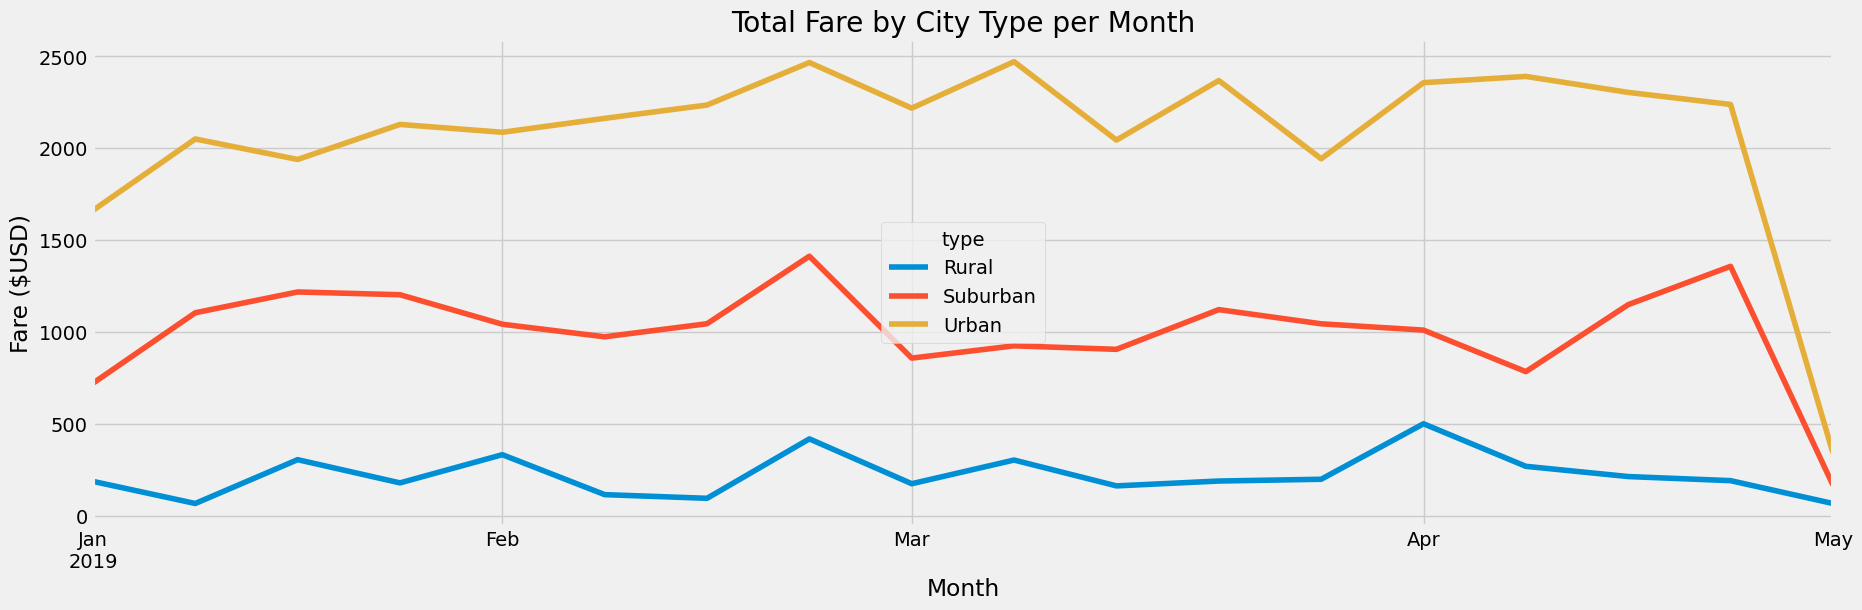

<Figure size 640x480 with 0 Axes>

In [60]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_rides = weekly_rides_df.plot(figsize = (20,6))
# Add a title 
weekly_rides.set_title("Total Fare by City Type per Month")
#  Add a x- and y-axis label.
weekly_rides.set_xlabel("Month")
weekly_rides.set_ylabel("Fare ($USD)")

plt.savefig("../analysis/Rides per Month")

plt.show()
plt.tight_layout()